In [1]:
from pathlib import Path
import os


# Establece los directorios de trabajo
current_path = "."
try:
    current_path = os.getcwd()
except:
    pass

maps_path = Path(current_path).parent.as_posix()

print(f"{current_path=}")
print(f"{maps_path=}")

current_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab/utils'
maps_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab'


In [2]:
import re


# Filtra archivos de partido por sección electoral.
json_files = sorted([file for file in os.listdir(maps_path) if re.match(r"^B\d_.*.json$", file)])

print(json_files)

['B1_Buenos_Aires_seccion_electoral_primera.json', 'B2_Buenos_Aires_seccion_electoral_segunda.json', 'B3_Buenos_Aires_seccion_electoral_tercera.json', 'B4_Buenos_Aires_seccion_electoral_cuarta.json', 'B5_Buenos_Aires_seccion_electoral_quinta.json', 'B6_Buenos_Aires_seccion_electoral_sexta.json', 'B7_Buenos_Aires_seccion_electoral_septima.json', 'B8_Buenos_Aires_seccion_electoral_octava.json']


In [3]:
import json

def base_json():
    with open(os.path.join(maps_path, json_files[0]), "r") as reader:
        base_json = json.load(reader)
    
    base_json["features"] = []
    return base_json

def base_feature():
    with open(os.path.join(maps_path, json_files[0]), "r") as reader:
        base_json = json.load(reader)
    
    base_feature = base_json["features"][0]
    base_feature["geometry"]["coordinates"] = []

    return base_feature

In [4]:
new_json = base_json()

for json_file in json_files:
    with open(os.path.join(maps_path, json_file), "r") as reader:
        current_json = json.load(reader)
        
    seccion = re.search(r"(?<=_seccion_electoral_)\w+(?=.json)", json_file).group(0).upper()
    
    new_feature = base_feature()    
    for current_feature in current_json["features"]:
        current_coordinates = current_feature["geometry"]["coordinates"][0] \
            if current_feature["geometry"]["type"] == "MultiPolygon" \
            else current_feature["geometry"]["coordinates"]
        new_feature["geometry"]["coordinates"].append(current_coordinates)
        # Properties
        new_feature["properties"]["gid"] = len(new_json["features"]) + 1
        new_feature["properties"]["objeto"] = "Sección Electoral"
        new_feature["properties"]["fna"] = f"Sección Electoral {seccion.title()}"
        new_feature["properties"]["gna"] = "Sección Electoral"
        new_feature["properties"]["nam"] = seccion.upper()
        new_feature["properties"]["in1"] = seccion.upper()
    new_json["features"].append(new_feature)
    
new_json   

{'type': 'FeatureCollection',
 'name': 'B1 - Buenos Aires sección electoral primera',
 'crs': {'type': 'Buenos Aires sección electoral primera',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'gid': 1,
    'objeto': 'Sección Electoral',
    'fna': 'Sección Electoral Primera',
    'gna': 'Sección Electoral',
    'nam': 'PRIMERA',
    'in1': 'PRIMERA',
    'fdc': 'ARBA - Gerencia de Servicios Catastrales',
    'sag': 'IGN'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-58.479285224999956, -34.49439744699998],
       [-58.47935303999998, -34.494418861999975],
       [-58.47941680499997, -34.494413760999976],
       [-58.47944226899995, -34.494411723999974],
       [-58.47953149899996, -34.494411723999974],
       [-58.47952436099996, -34.49446883099995],
       [-58.47948509999998, -34.49448667699994],
       [-58.47948509999998, -34.494568767999965],
       [-58.47950651499997, -34.49464729099998],
      

In [5]:
# Exporta el resultado
results_filename = "E1_Buenos_Aires_todas_las_secciones_electorales.json"

with open(os.path.join(maps_path, results_filename), 'w', encoding='utf-8') as json_file:
    json.dump(new_json, json_file, ensure_ascii=True)

<Axes: >

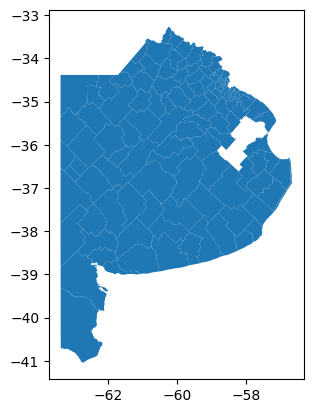

In [6]:
import geopandas

newdf = geopandas.read_file(os.path.join(maps_path, results_filename))

newdf.plot()

Faltan `CHASCOMUS`, `LEZAMA` y `PILA`

![](https://upload.wikimedia.org/wikipedia/commons/4/45/DependenciasPciaBsAs.jpg)

In [7]:
import geopandas

bsas_file = "06_Partidos_de_Buenos_Aires.json"

bsas = geopandas.read_file(os.path.join(maps_path, bsas_file))

missing_nams = bsas.loc[bsas["nam"].str.contains(r"^(chascom.s|pila|lezama)$" , regex=True, case=False), "nam"].to_list()

/tmp/ipykernel_29457/1157590287.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  missing_nams = bsas.loc[bsas["nam"].str.contains(r"^(chascom.s|pila|lezama)$" , regex=True, case=False), "nam"].to_list()


6
1443


/tmp/ipykernel_29457/3362894718.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bsas.loc[bsas["nam"].str.contains(r"^(pila)$" , regex=True, case=False)].plot()
/tmp/ipykernel_29457/3362894718.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bsas.loc[bsas["nam"].str.contains(r"^(pila)$", regex=True, case=False), "geometry"].to_json()


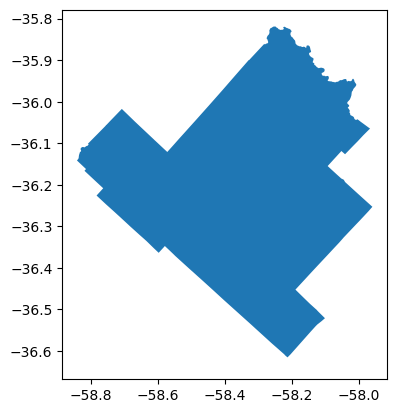

In [8]:
# Pila tiene múltiples polígonos
bsas.loc[bsas["nam"].str.contains(r"^(pila)$" , regex=True, case=False)].plot()

pila_coordinates = json.loads(
    bsas.loc[bsas["nam"].str.contains(r"^(pila)$", regex=True, case=False), "geometry"].to_json()
)["features"][0]["geometry"]["coordinates"]

print(len(pila_coordinates[0][0]))
print(len(pila_coordinates[1][0]))

In [9]:
with open(os.path.join(maps_path, bsas_file), "r") as reader:
    missing_json = json.load(reader)
    
for feature in new_json["features"]:
    if feature["properties"]["nam"] != "QUINTA":
        continue
    
    print(feature["properties"])
    
    for missing_feature in missing_json["features"]:
        if missing_feature["properties"]["nam"] not in missing_nams:
            continue
        
        print(missing_feature["properties"])
        
        missing_coordinates = missing_feature["geometry"]["coordinates"][0] \
            if missing_feature["geometry"]["type"] == "MultiPolygon" \
            else missing_feature["geometry"]["coordinates"]
        
        print(missing_feature["geometry"]["type"])
        print(len(missing_coordinates[0]))
        
        feature["geometry"]["coordinates"].append(missing_coordinates)
    
    for polygon in pila_coordinates:
        feature["geometry"]["coordinates"].append(polygon)

{'gid': 5, 'objeto': 'Sección Electoral', 'fna': 'Sección Electoral Quinta', 'gna': 'Sección Electoral', 'nam': 'QUINTA', 'in1': 'QUINTA', 'fdc': 'ARBA - Gerencia de Servicios Catastrales', 'sag': 'IGN'}
{'gid': 67, 'objeto': 'Departamento', 'fna': 'Partido de Lezama', 'gna': 'Partido', 'nam': 'Lezama', 'in1': '06466', 'fdc': 'ARBA - Gerencia de Servicios Catastrales', 'sag': 'IGN'}
MultiPolygon
1307
{'gid': 68, 'objeto': 'Departamento', 'fna': 'Partido de Chascomús', 'gna': 'Partido', 'nam': 'Chascomús', 'in1': '06218', 'fdc': 'ARBA - Gerencia de Servicios Catastrales', 'sag': 'IGN'}
MultiPolygon
3544
{'gid': 309, 'objeto': 'Departamento', 'fna': 'Partido de Pila', 'gna': 'Partido', 'nam': 'Pila', 'in1': '06630', 'fdc': 'ARBA - Gerencia de Servicios Catastrales', 'sag': 'IGN'}
MultiPolygon
6


In [10]:
results_filename = "E1_Buenos_Aires_todas_las_secciones_electorales.json"

with open(os.path.join(maps_path, results_filename), 'w', encoding='utf-8') as writer:
    json.dump(new_json, writer, ensure_ascii=True)

<Axes: >

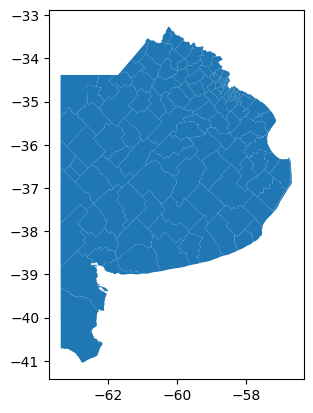

In [11]:
newdf = geopandas.read_file(os.path.join(maps_path, results_filename))

newdf.plot()